In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [8]:
with open("./examples/dynamic/traces/kernelslist", "rb") as f:
    trace = json.load(f)

In [18]:
def flatten(l):
    return [item for sublist in l for item in sublist]

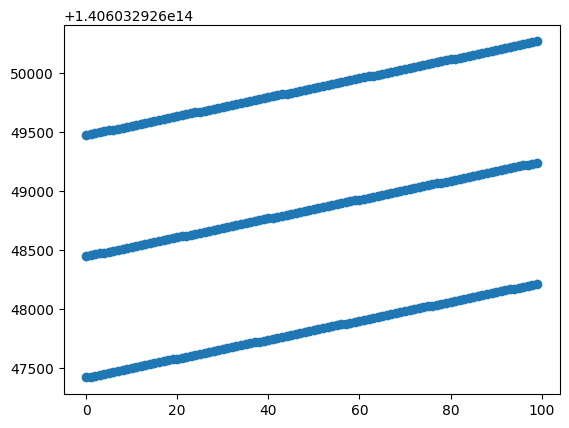

In [27]:
# addresses = flatten([t["addrs"] for t in trace])
# addresses = [a for a in addresses if a > 0]
entries = flatten([
    [(t["warp_id"], 32*t["warp_id"]+tid, a) for tid, a in enumerate(t["addrs"]) if a > 0]
    for t in trace
])
# sort by warp id
entries = sorted(entries, key=lambda x: x[0])
addresses = [e[2] for e in entries]
time = range(len(addresses))
time = [e[1] for e in entries]
plt.scatter(time, addresses)
plt.show()

In [16]:
# check: single precision (parameterize code)
# check: microbenchmarks
# check: coalescing sizes, requests vs. actual loads/stores
# write down expectation

for t in trace:
    print(dict(
        grd_launch_id=t["grid_launch_id"],
        cta=f"({t['cta_id_x']},{t['cta_id_y']},{t['cta_id_z']})",
        warp_id=t["warp_id"],
        opcode_id=t["opcode_id"],
        addrs=[hex(addr) for addr in t["addrs"]], # " ".join(
    ))

{'grd_launch_id': 0, 'cta': '(0,0,0)', 'warp_id': 1, 'opcode_id': 0, 'addrs': ['0x7fe0c1500100', '0x7fe0c1500108', '0x7fe0c1500110', '0x7fe0c1500118', '0x7fe0c1500120', '0x7fe0c1500128', '0x7fe0c1500130', '0x7fe0c1500138', '0x7fe0c1500140', '0x7fe0c1500148', '0x7fe0c1500150', '0x7fe0c1500158', '0x7fe0c1500160', '0x7fe0c1500168', '0x7fe0c1500170', '0x7fe0c1500178', '0x7fe0c1500180', '0x7fe0c1500188', '0x7fe0c1500190', '0x7fe0c1500198', '0x7fe0c15001a0', '0x7fe0c15001a8', '0x7fe0c15001b0', '0x7fe0c15001b8', '0x7fe0c15001c0', '0x7fe0c15001c8', '0x7fe0c15001d0', '0x7fe0c15001d8', '0x7fe0c15001e0', '0x7fe0c15001e8', '0x7fe0c15001f0', '0x7fe0c15001f8']}
{'grd_launch_id': 0, 'cta': '(0,0,0)', 'warp_id': 0, 'opcode_id': 0, 'addrs': ['0x7fe0c1500000', '0x7fe0c1500008', '0x7fe0c1500010', '0x7fe0c1500018', '0x7fe0c1500020', '0x7fe0c1500028', '0x7fe0c1500030', '0x7fe0c1500038', '0x7fe0c1500040', '0x7fe0c1500048', '0x7fe0c1500050', '0x7fe0c1500058', '0x7fe0c1500060', '0x7fe0c1500068', '0x7fe0c15000

NameError: name 'flatten' is not defined